# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 19.05 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
!ls MNIST

processed  raw


In [5]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [6]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

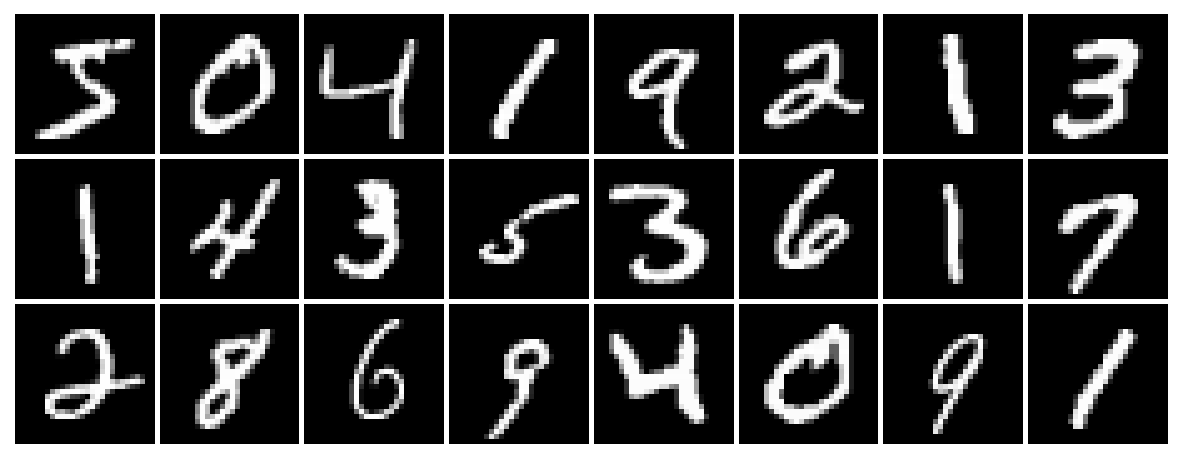

In [7]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


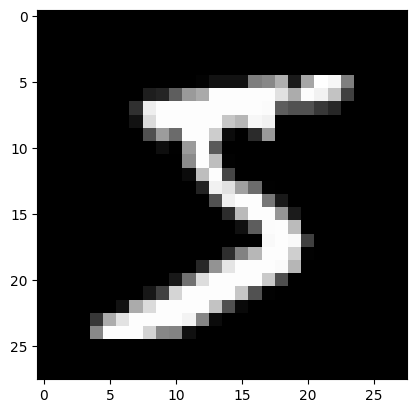

In [8]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [9]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na saída

### Testando um predict com poucas amostras

In [10]:
xin = x_train[:5].view(-1,28*28)
score = model(xin)
score

tensor([[-0.2120, -0.0560, -0.0744, -0.0283, -0.0304,  0.0666, -0.3620,  0.2180,
         -0.1154, -0.1323],
        [-0.1702, -0.1283, -0.1018,  0.0955, -0.3572, -0.5536, -0.0518,  0.0771,
         -0.0958, -0.0583],
        [ 0.1075,  0.2940,  0.0289,  0.0458,  0.3653, -0.0729, -0.0063, -0.0855,
         -0.0711, -0.2988],
        [ 0.0950,  0.1277, -0.3119, -0.0476, -0.1217, -0.1428,  0.1392,  0.1537,
         -0.1872, -0.2003],
        [ 0.1167,  0.0948, -0.1768,  0.0019, -0.1913, -0.0552, -0.4216, -0.0487,
         -0.1573, -0.3135]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [11]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [12]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-2n_jlp7x
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-2n_jlp7x
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4972 sha256=48ac0883065cd7a4a659e226299a613144a149ec2cc21ba7ed2bd28ca6f8dab6
  Stored in directory: /tmp/pip-ephem-wheel-cache-z8q3fxuh/wheels/8a/88/98/69bcb99aba99a6bba9b2b81439cbda0101df40c49e639c4216
Successfully built torchviz


In [13]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model((x_train.view(-1,28*28)))
loss = criterion(y_pred,(y_train))
loss


tensor(2.3516, grad_fn=<NllLossBackward0>)

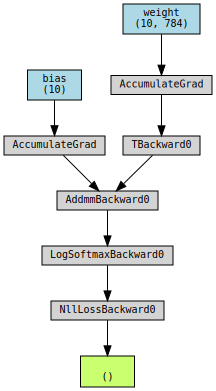

In [14]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

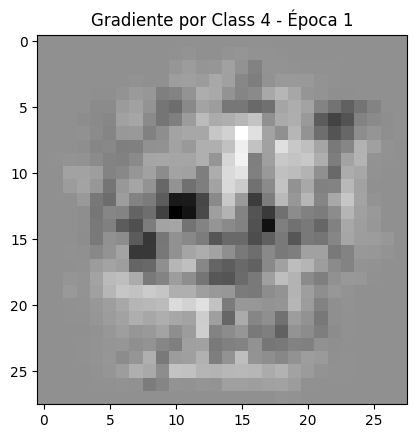

Época[1/100], Loss: 0.263672, Accuracy: 0.942000


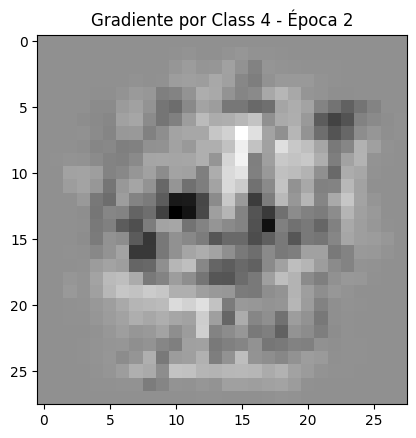

Época[2/100], Loss: 0.262353, Accuracy: 0.942000


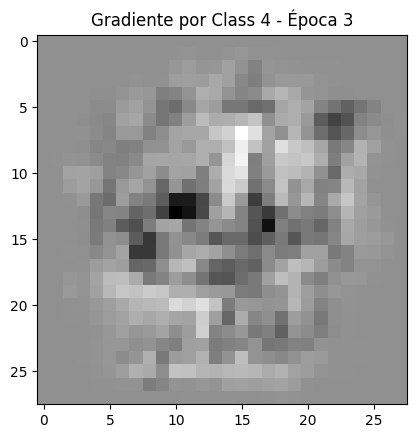

Época[3/100], Loss: 0.261049, Accuracy: 0.942000


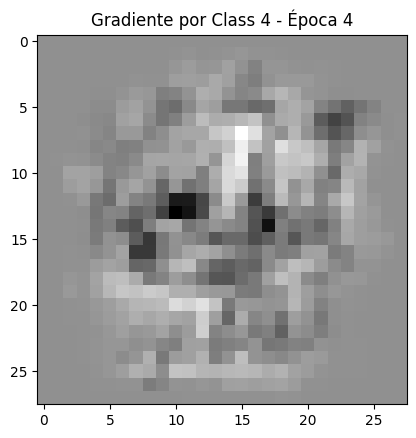

Época[4/100], Loss: 0.259760, Accuracy: 0.942000


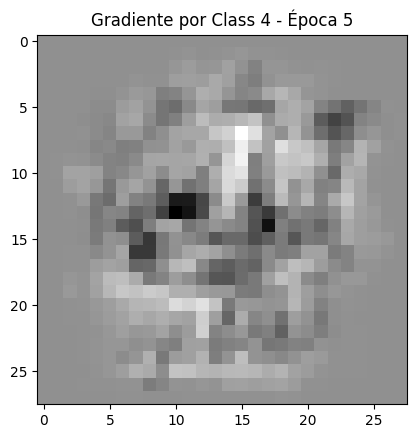

Época[5/100], Loss: 0.258486, Accuracy: 0.942000


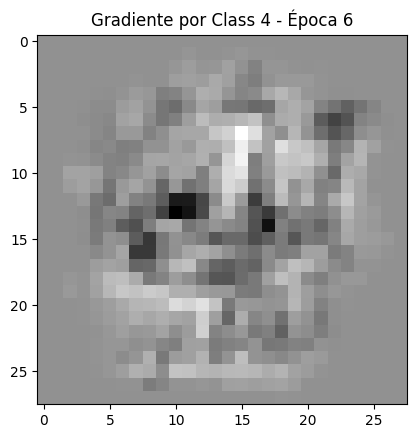

Época[6/100], Loss: 0.257227, Accuracy: 0.942000


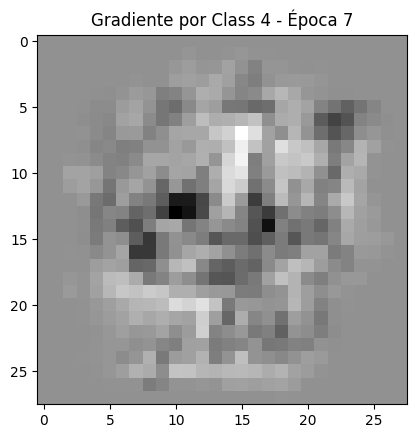

Época[7/100], Loss: 0.255982, Accuracy: 0.942000


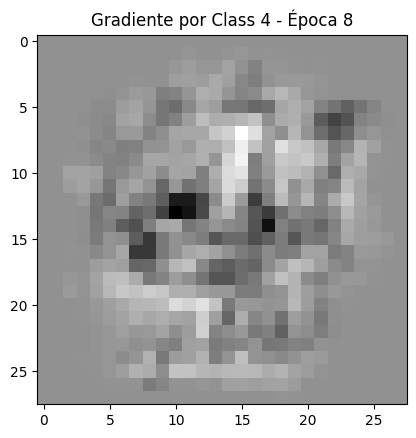

Época[8/100], Loss: 0.254751, Accuracy: 0.942000


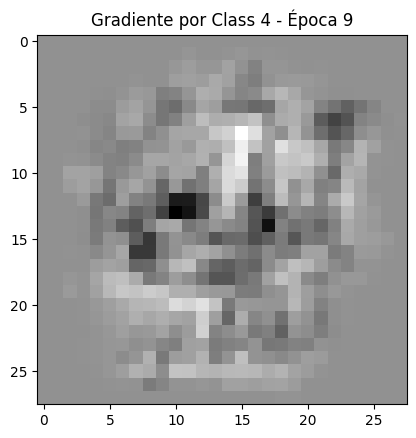

Época[9/100], Loss: 0.253534, Accuracy: 0.942000


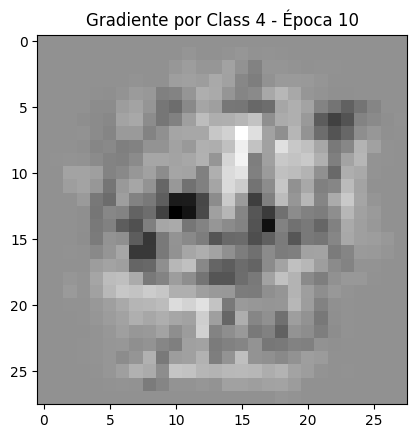

Época[10/100], Loss: 0.252330, Accuracy: 0.942000


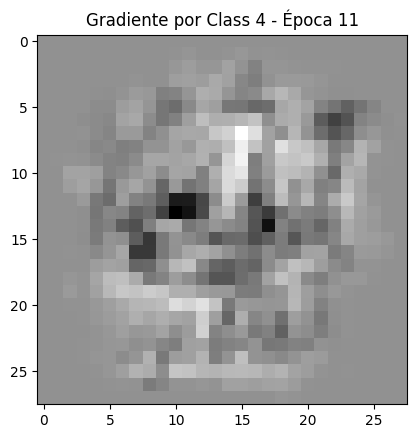

Época[11/100], Loss: 0.251139, Accuracy: 0.943000


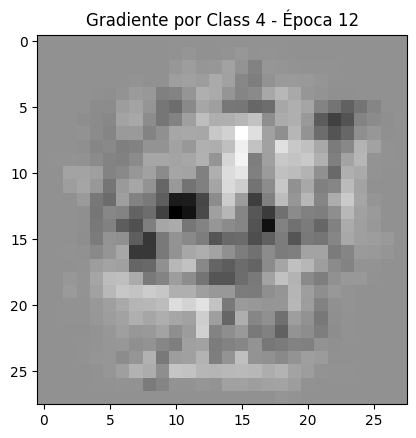

Época[12/100], Loss: 0.249961, Accuracy: 0.944000


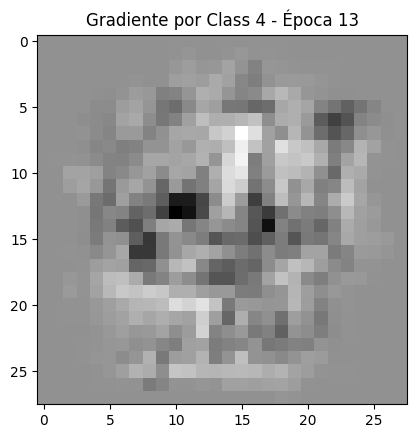

Época[13/100], Loss: 0.248796, Accuracy: 0.945000


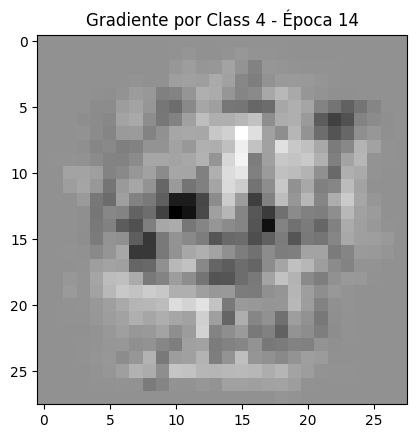

Época[14/100], Loss: 0.247644, Accuracy: 0.946000


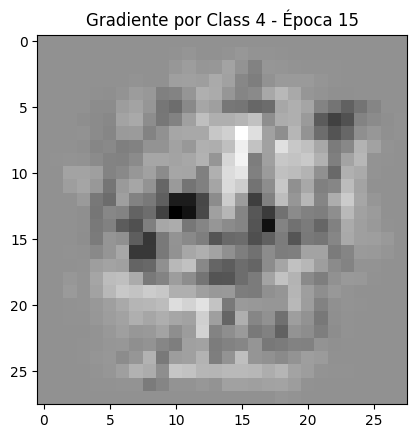

Época[15/100], Loss: 0.246503, Accuracy: 0.946000


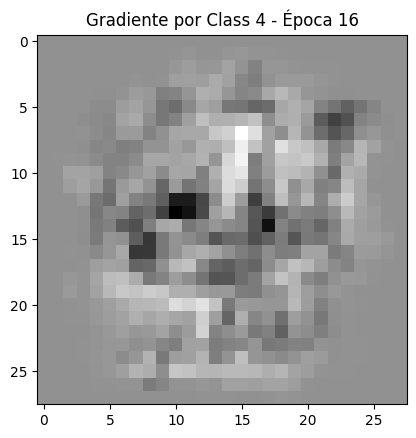

Época[16/100], Loss: 0.245374, Accuracy: 0.946000


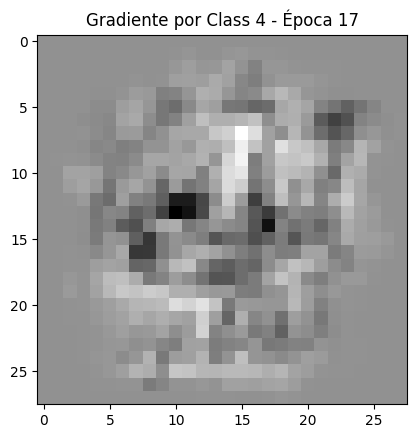

Época[17/100], Loss: 0.244257, Accuracy: 0.946000


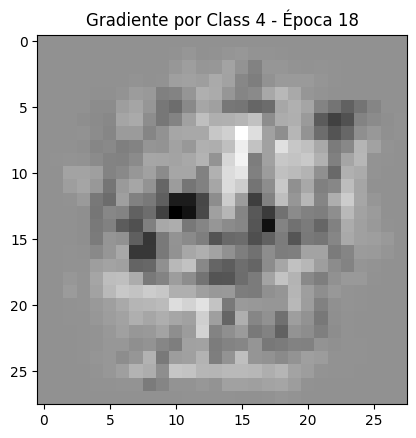

Época[18/100], Loss: 0.243151, Accuracy: 0.948000


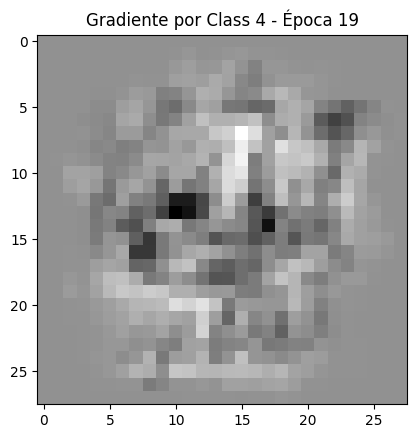

Época[19/100], Loss: 0.242057, Accuracy: 0.948000


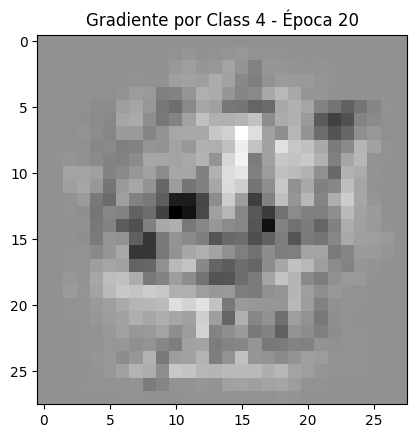

Época[20/100], Loss: 0.240974, Accuracy: 0.948000


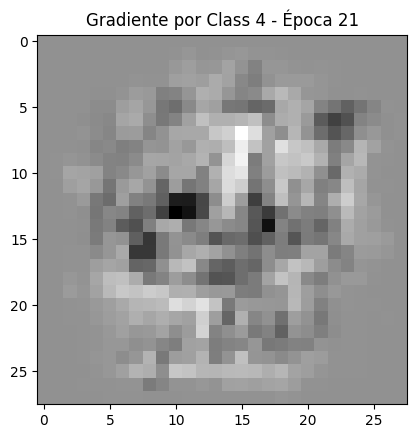

Época[21/100], Loss: 0.239901, Accuracy: 0.949000


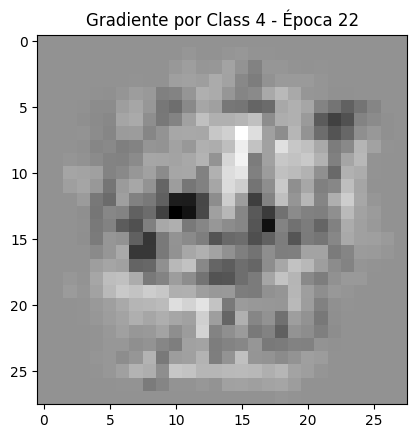

Época[22/100], Loss: 0.238839, Accuracy: 0.949000


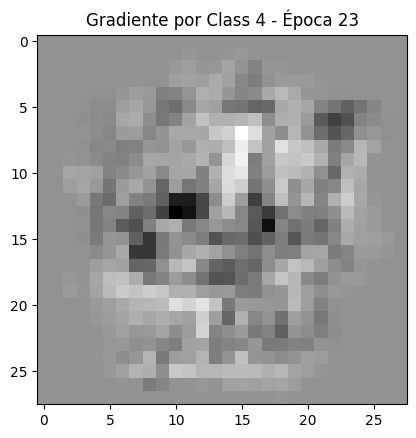

Época[23/100], Loss: 0.237788, Accuracy: 0.949000


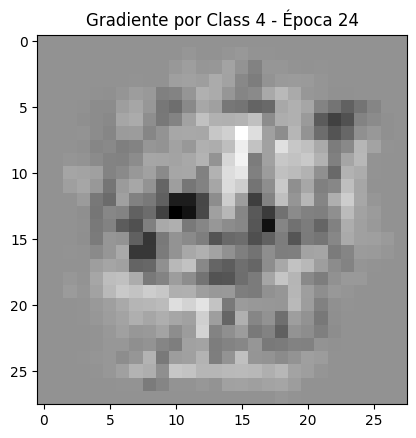

Época[24/100], Loss: 0.236746, Accuracy: 0.950000


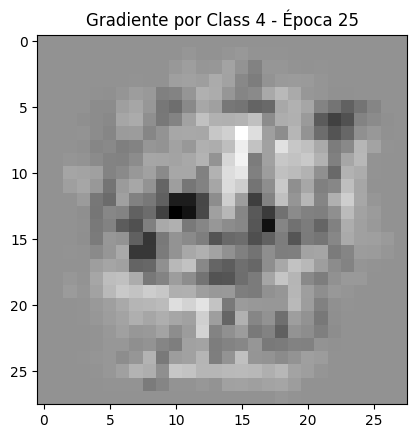

Época[25/100], Loss: 0.235715, Accuracy: 0.950000


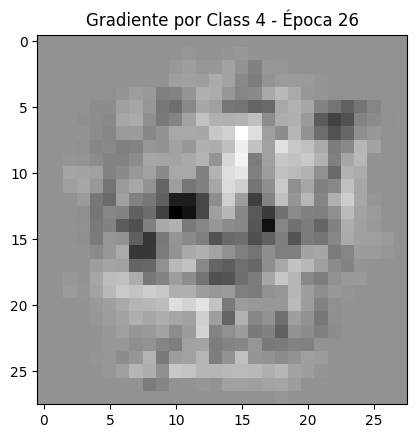

Época[26/100], Loss: 0.234694, Accuracy: 0.950000


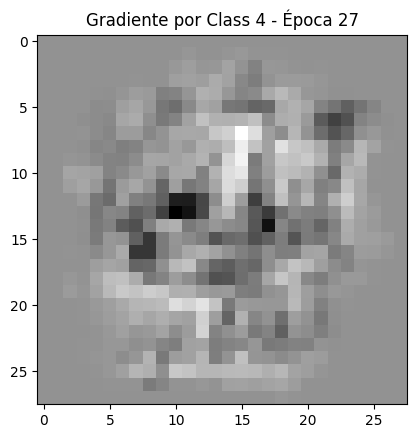

Época[27/100], Loss: 0.233682, Accuracy: 0.951000


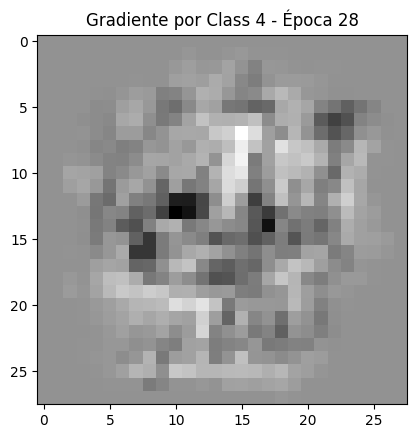

Época[28/100], Loss: 0.232680, Accuracy: 0.951000


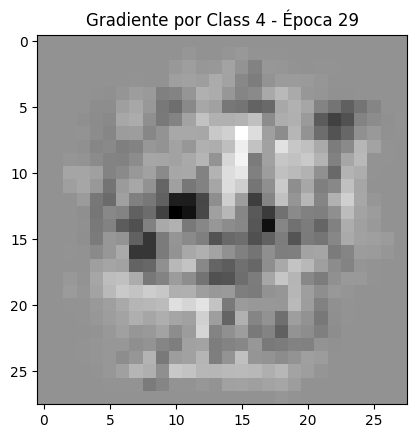

Época[29/100], Loss: 0.231688, Accuracy: 0.951000


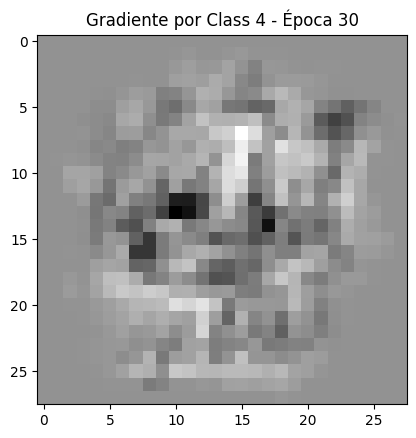

Época[30/100], Loss: 0.230704, Accuracy: 0.951000


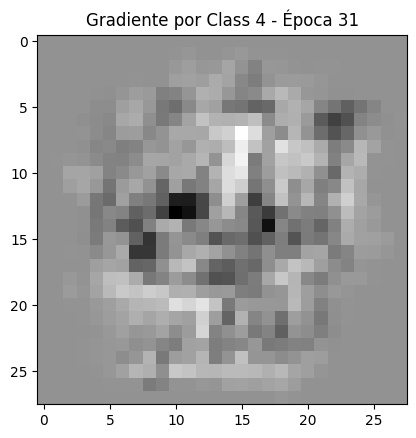

Época[31/100], Loss: 0.229730, Accuracy: 0.951000


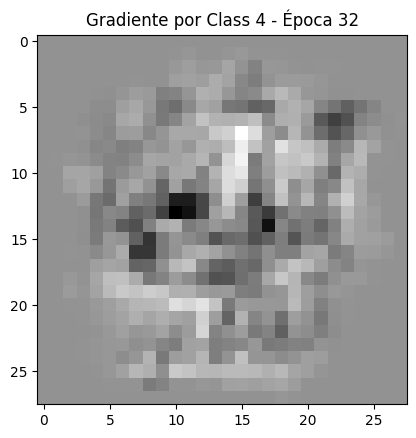

Época[32/100], Loss: 0.228765, Accuracy: 0.951000


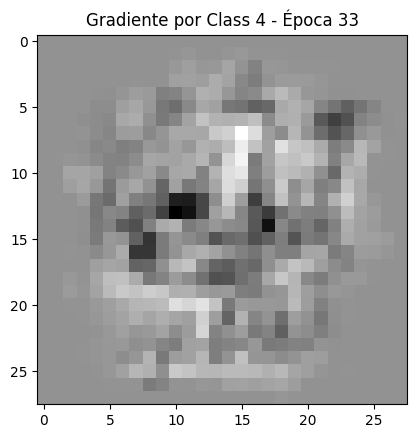

Época[33/100], Loss: 0.227808, Accuracy: 0.951000


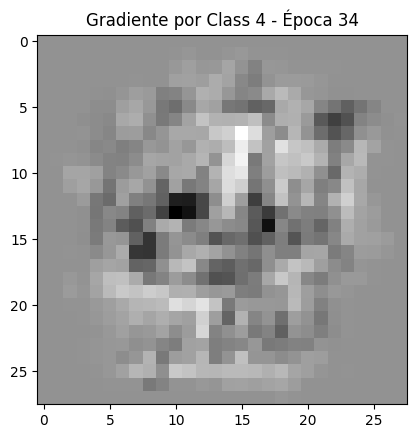

Época[34/100], Loss: 0.226860, Accuracy: 0.951000


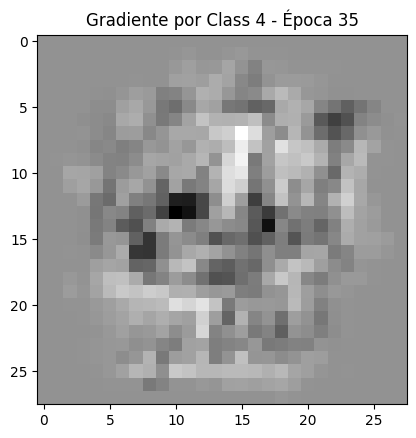

Época[35/100], Loss: 0.225921, Accuracy: 0.951000


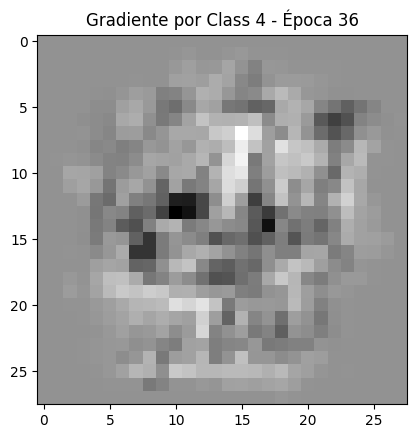

Época[36/100], Loss: 0.224990, Accuracy: 0.953000


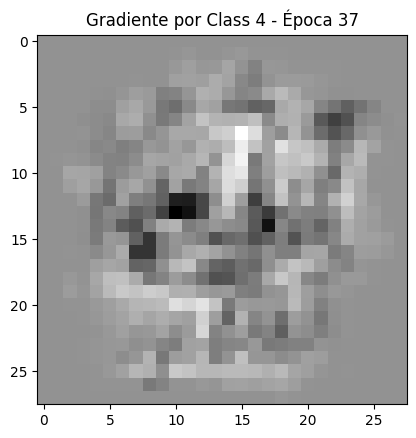

Época[37/100], Loss: 0.224067, Accuracy: 0.953000


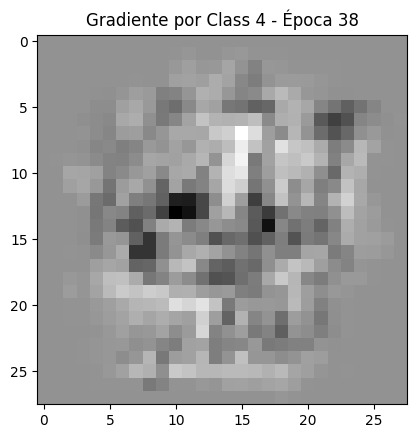

Época[38/100], Loss: 0.223152, Accuracy: 0.954000


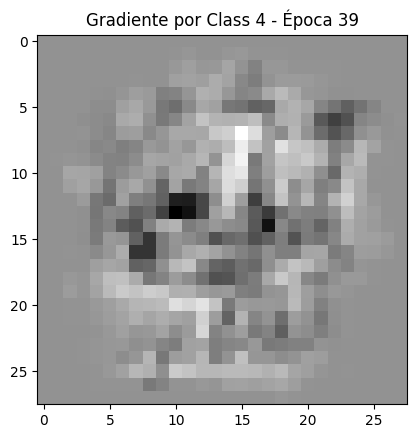

Época[39/100], Loss: 0.222245, Accuracy: 0.954000


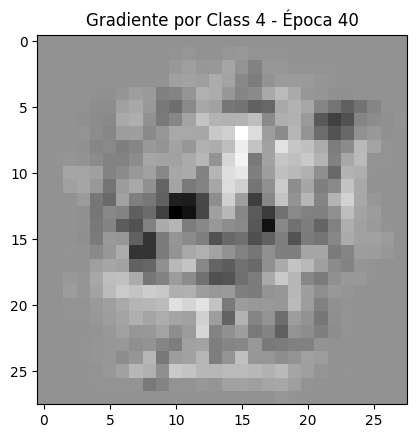

Época[40/100], Loss: 0.221346, Accuracy: 0.954000


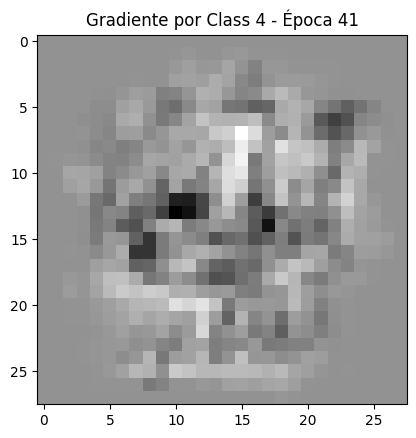

Época[41/100], Loss: 0.220455, Accuracy: 0.954000


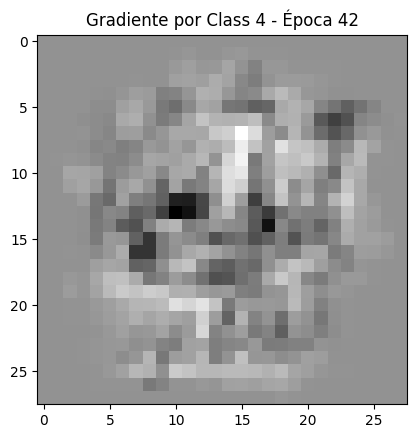

Época[42/100], Loss: 0.219571, Accuracy: 0.954000


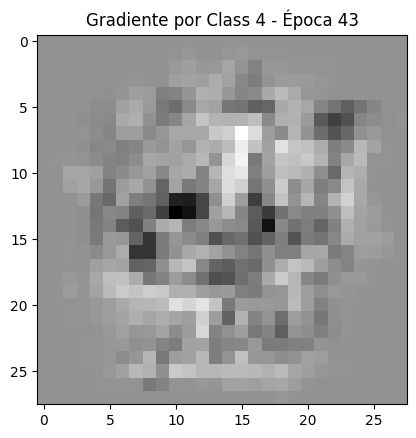

Época[43/100], Loss: 0.218695, Accuracy: 0.954000


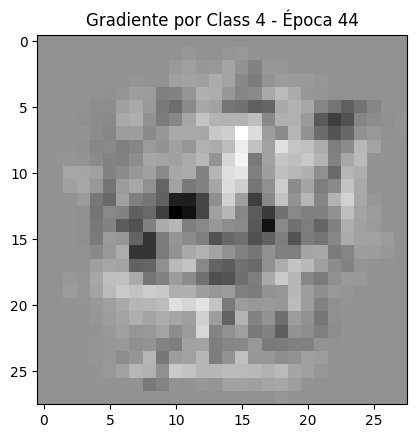

Época[44/100], Loss: 0.217826, Accuracy: 0.954000


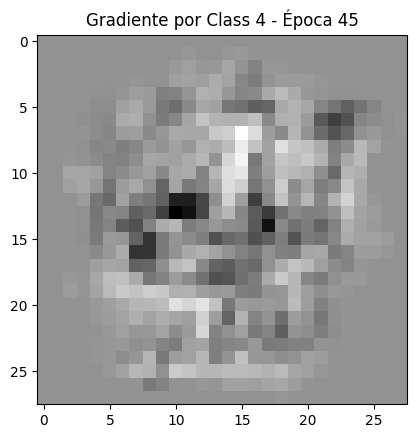

Época[45/100], Loss: 0.216965, Accuracy: 0.954000


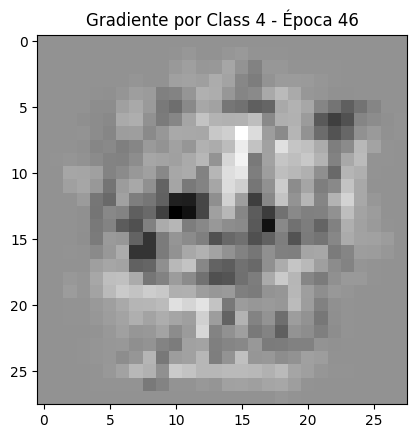

Época[46/100], Loss: 0.216111, Accuracy: 0.954000


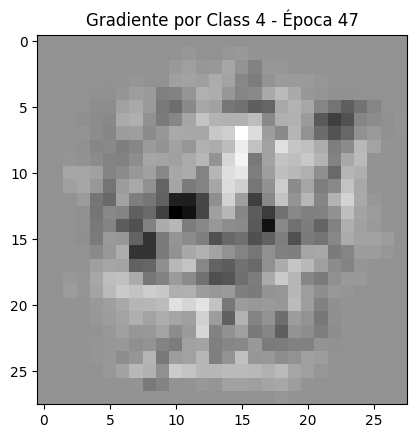

Época[47/100], Loss: 0.215263, Accuracy: 0.954000


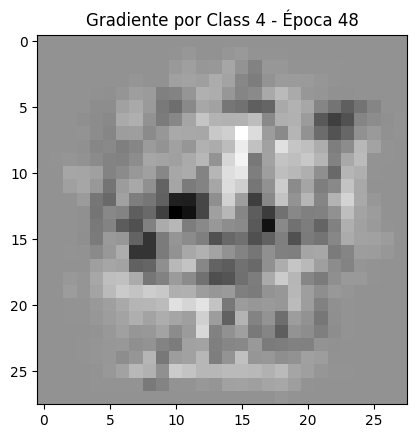

Época[48/100], Loss: 0.214423, Accuracy: 0.954000


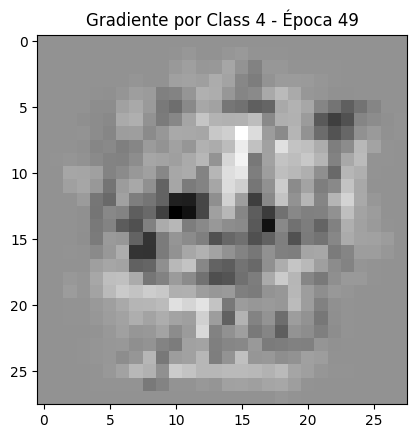

Época[49/100], Loss: 0.213590, Accuracy: 0.955000


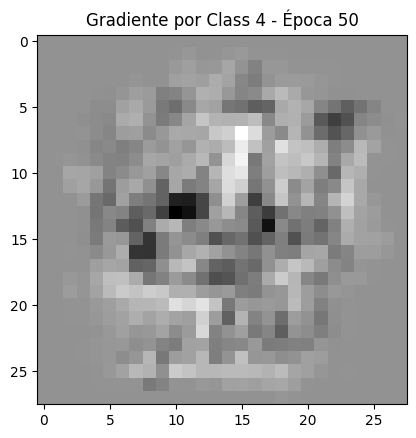

Época[50/100], Loss: 0.212763, Accuracy: 0.956000


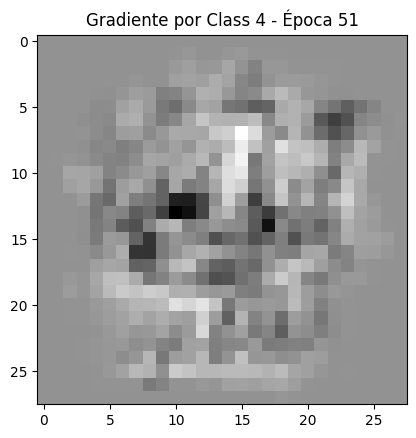

Época[51/100], Loss: 0.211943, Accuracy: 0.956000


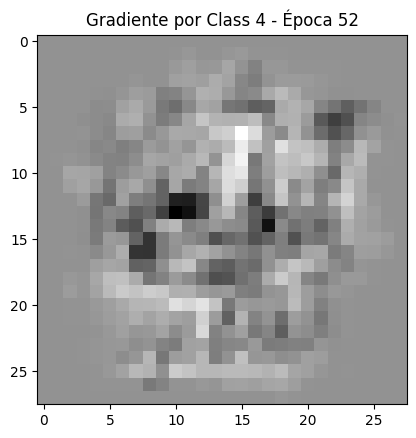

Época[52/100], Loss: 0.211129, Accuracy: 0.956000


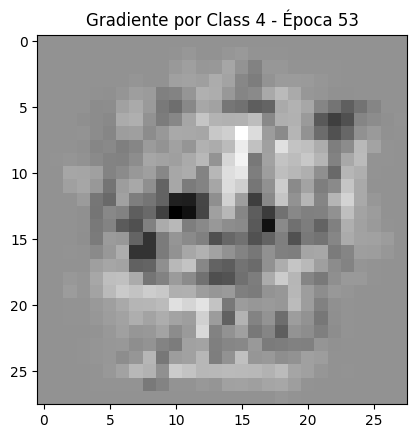

Época[53/100], Loss: 0.210322, Accuracy: 0.957000


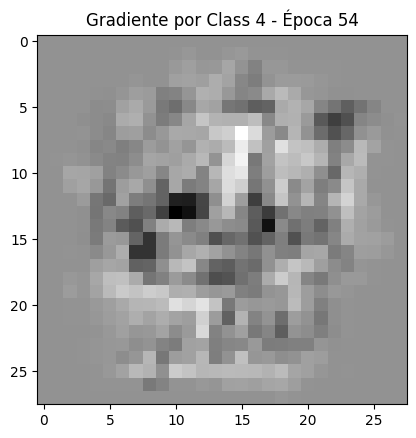

Época[54/100], Loss: 0.209522, Accuracy: 0.958000


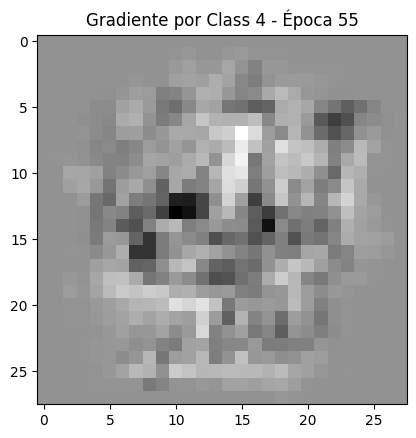

Época[55/100], Loss: 0.208727, Accuracy: 0.958000


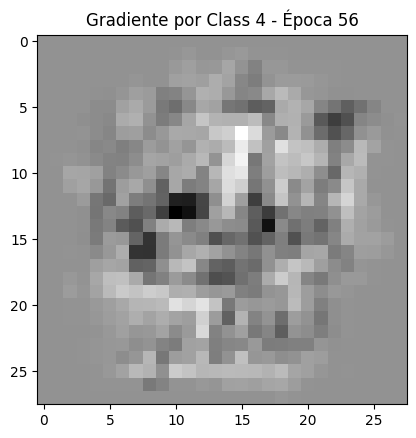

Época[56/100], Loss: 0.207939, Accuracy: 0.958000


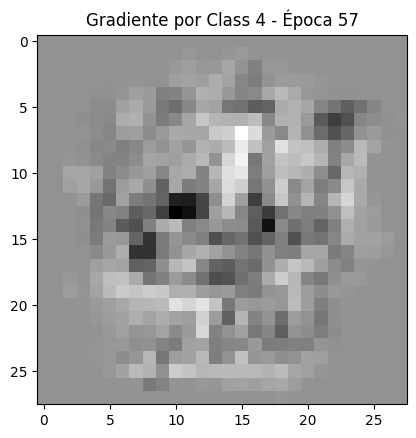

Época[57/100], Loss: 0.207157, Accuracy: 0.960000


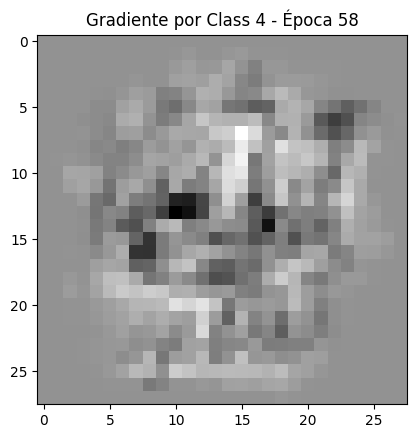

Época[58/100], Loss: 0.206381, Accuracy: 0.960000


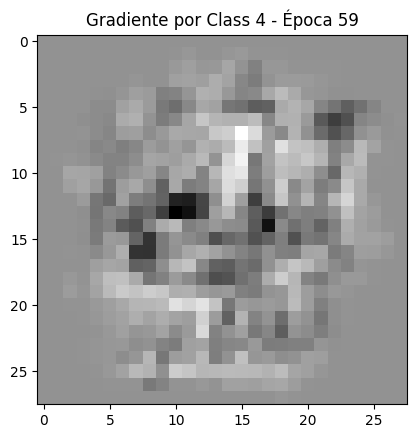

Época[59/100], Loss: 0.205611, Accuracy: 0.960000


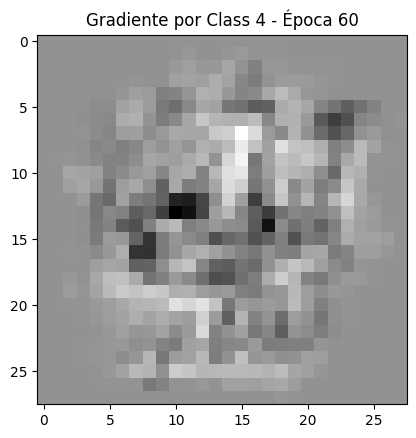

Época[60/100], Loss: 0.204847, Accuracy: 0.960000


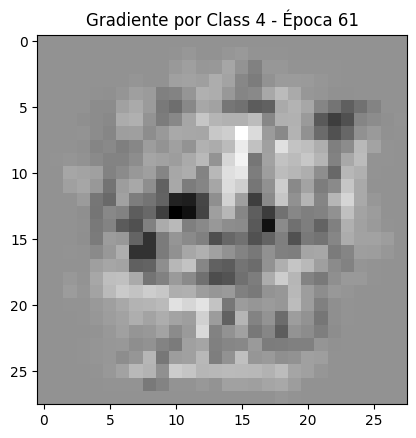

Época[61/100], Loss: 0.204089, Accuracy: 0.960000


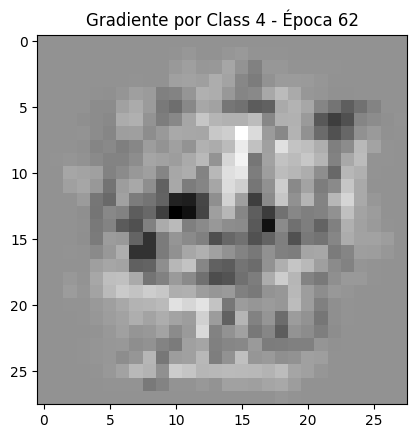

Época[62/100], Loss: 0.203337, Accuracy: 0.960000


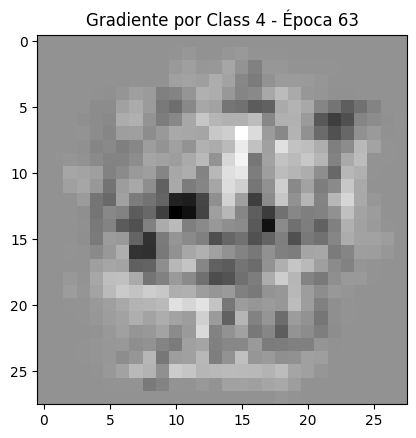

Época[63/100], Loss: 0.202590, Accuracy: 0.960000


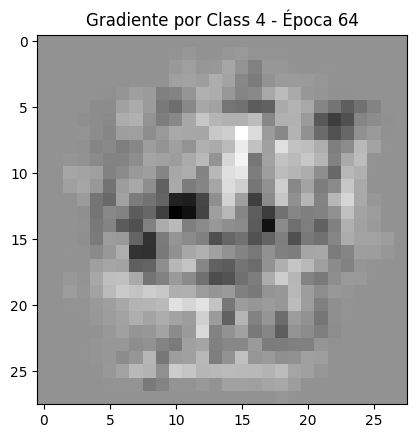

Época[64/100], Loss: 0.201848, Accuracy: 0.961000


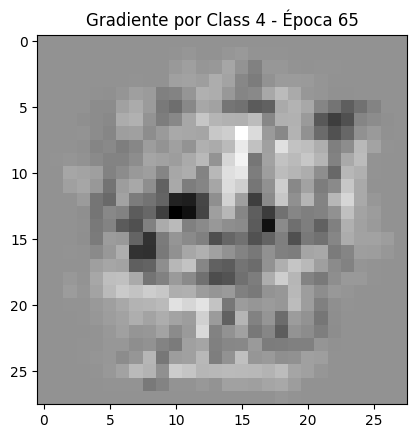

Época[65/100], Loss: 0.201112, Accuracy: 0.961000


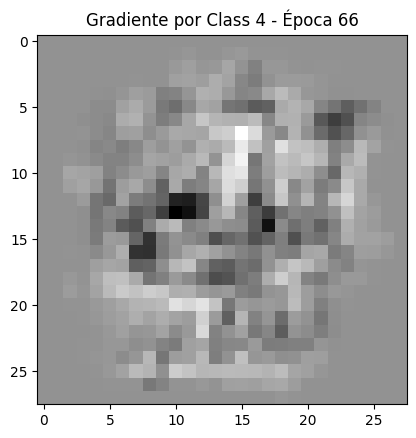

Época[66/100], Loss: 0.200382, Accuracy: 0.961000


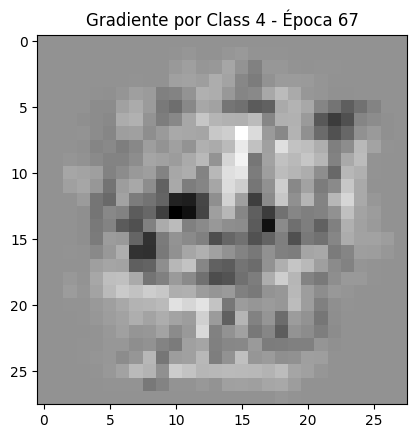

Época[67/100], Loss: 0.199657, Accuracy: 0.961000


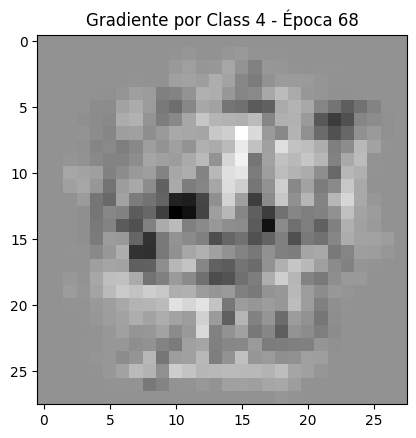

Época[68/100], Loss: 0.198937, Accuracy: 0.961000


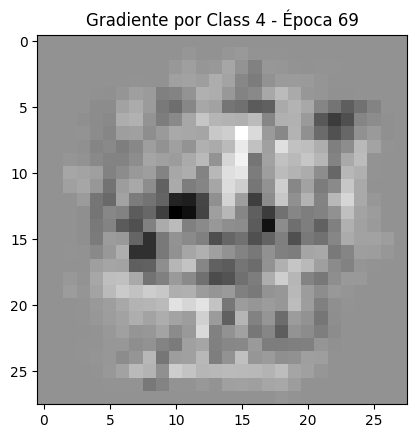

Época[69/100], Loss: 0.198223, Accuracy: 0.961000


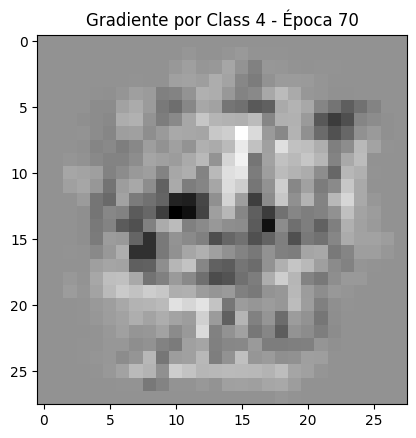

Época[70/100], Loss: 0.197514, Accuracy: 0.961000


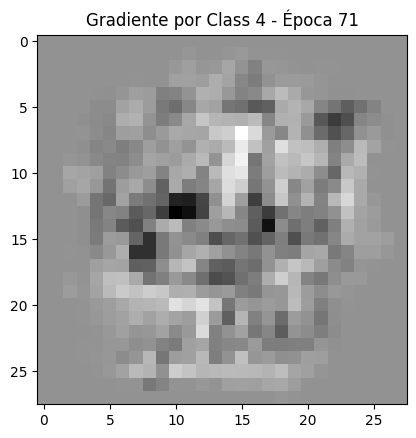

Época[71/100], Loss: 0.196809, Accuracy: 0.962000


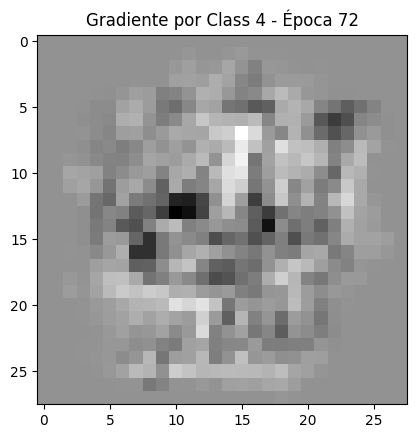

Época[72/100], Loss: 0.196110, Accuracy: 0.962000


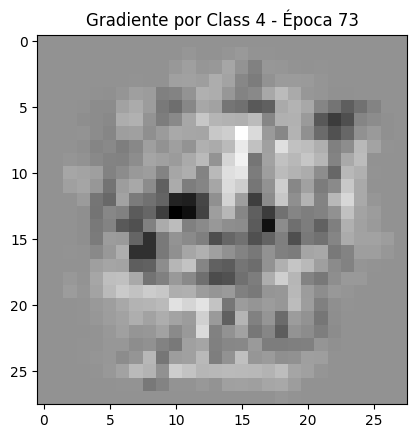

Época[73/100], Loss: 0.195416, Accuracy: 0.962000


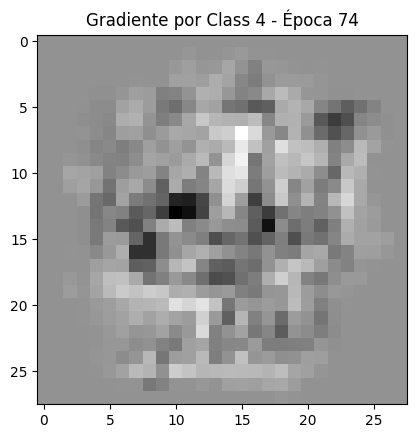

Época[74/100], Loss: 0.194727, Accuracy: 0.962000


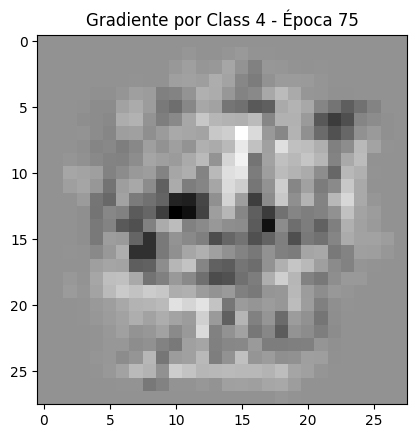

Época[75/100], Loss: 0.194042, Accuracy: 0.963000


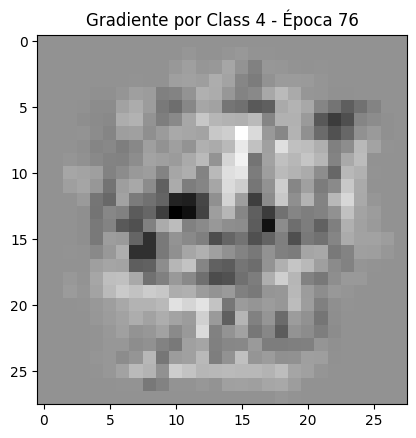

Época[76/100], Loss: 0.193363, Accuracy: 0.963000


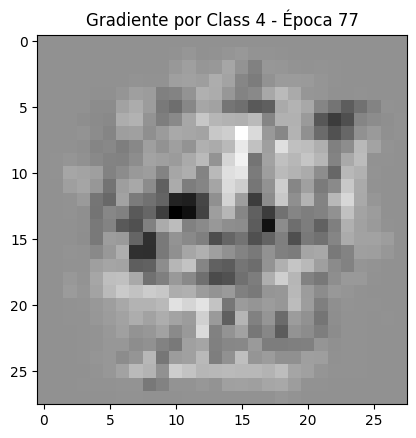

Época[77/100], Loss: 0.192688, Accuracy: 0.963000


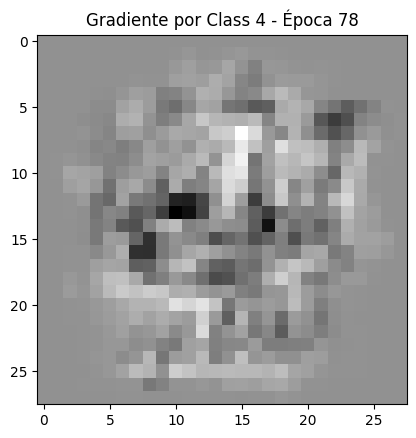

Época[78/100], Loss: 0.192018, Accuracy: 0.963000


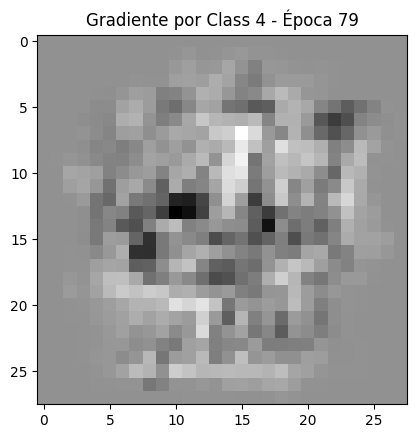

Época[79/100], Loss: 0.191352, Accuracy: 0.963000


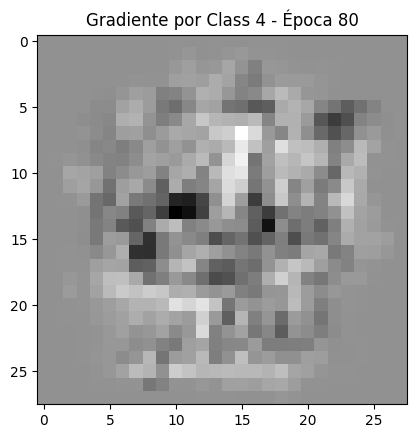

Época[80/100], Loss: 0.190691, Accuracy: 0.964000


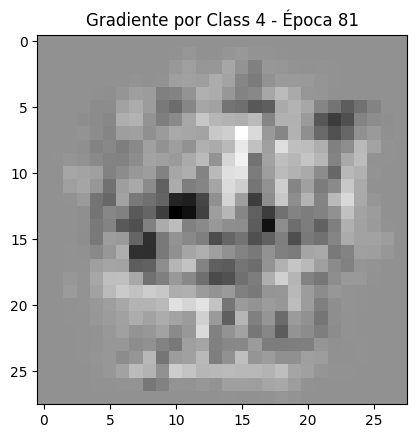

Época[81/100], Loss: 0.190035, Accuracy: 0.964000


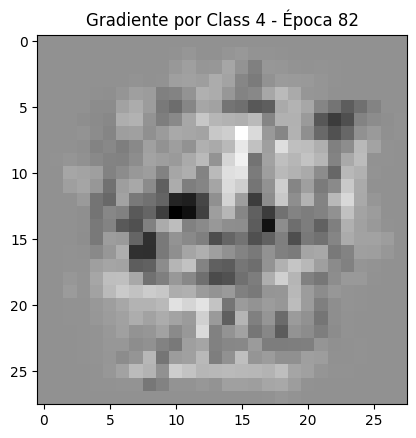

Época[82/100], Loss: 0.189383, Accuracy: 0.964000


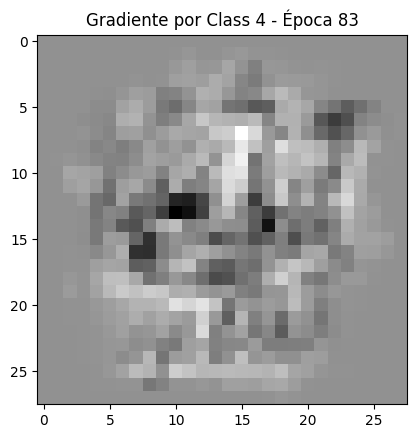

Época[83/100], Loss: 0.188735, Accuracy: 0.965000


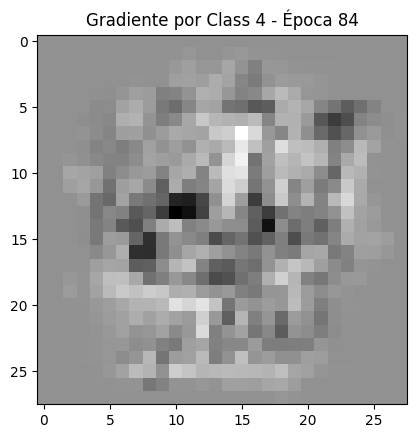

Época[84/100], Loss: 0.188092, Accuracy: 0.965000


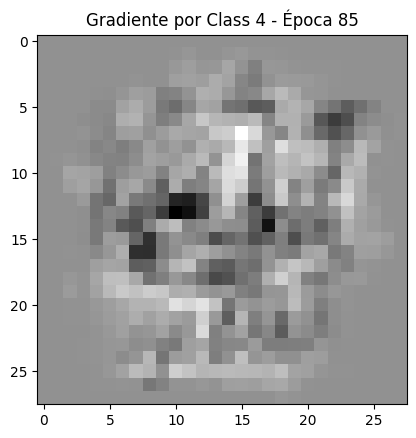

Época[85/100], Loss: 0.187453, Accuracy: 0.965000


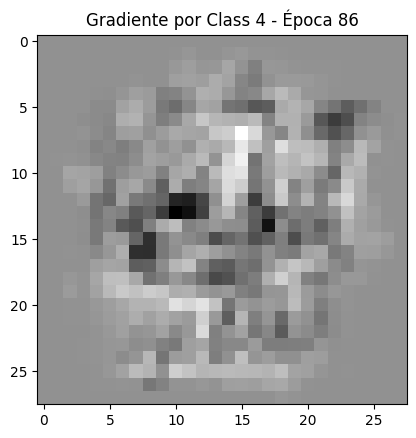

Época[86/100], Loss: 0.186818, Accuracy: 0.965000


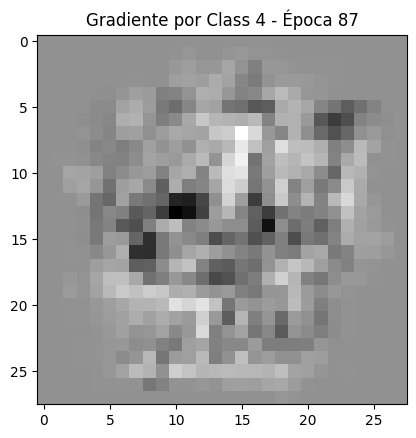

Época[87/100], Loss: 0.186188, Accuracy: 0.965000


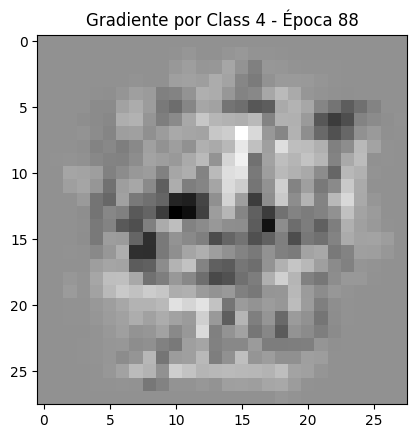

Época[88/100], Loss: 0.185562, Accuracy: 0.965000


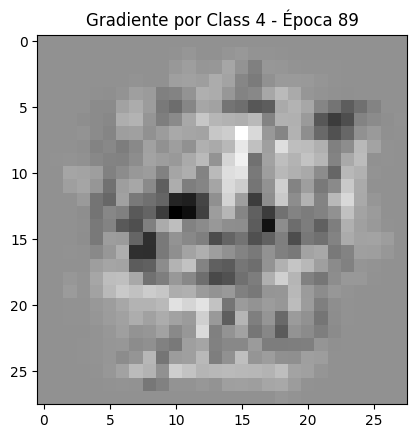

Época[89/100], Loss: 0.184940, Accuracy: 0.965000


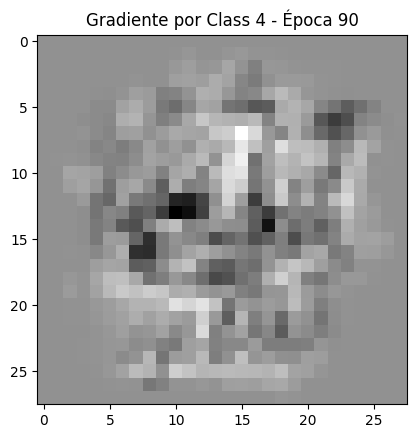

Época[90/100], Loss: 0.184322, Accuracy: 0.965000


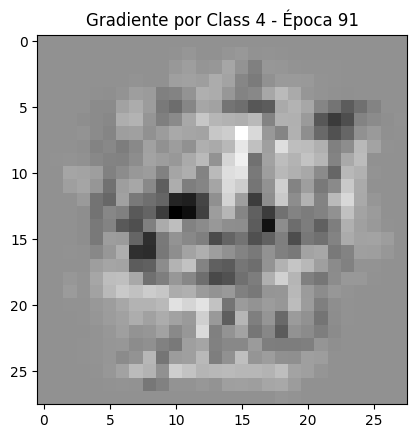

Época[91/100], Loss: 0.183708, Accuracy: 0.965000


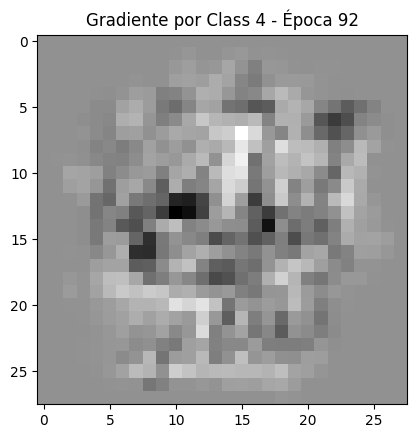

Época[92/100], Loss: 0.183098, Accuracy: 0.966000


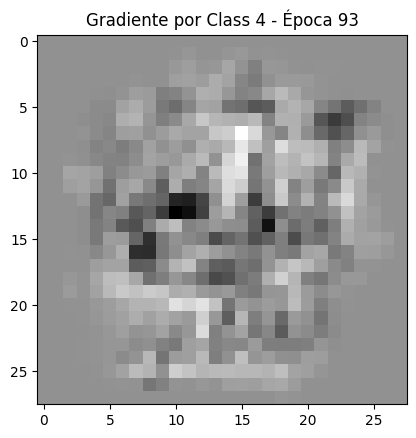

Época[93/100], Loss: 0.182492, Accuracy: 0.966000


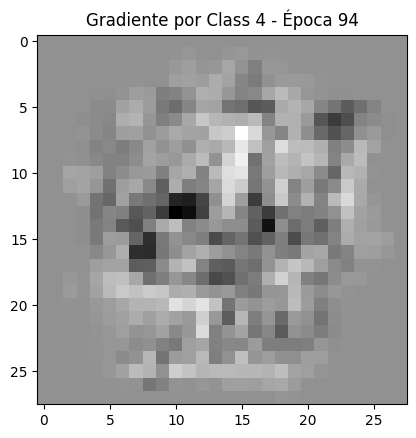

Época[94/100], Loss: 0.181890, Accuracy: 0.966000


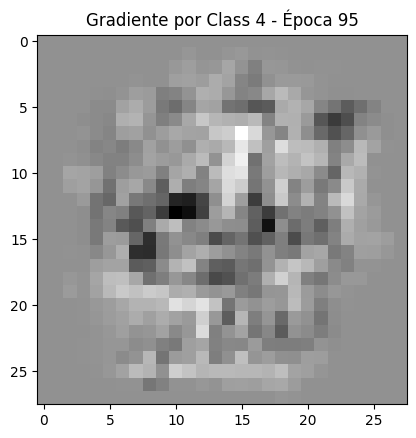

Época[95/100], Loss: 0.181291, Accuracy: 0.966000


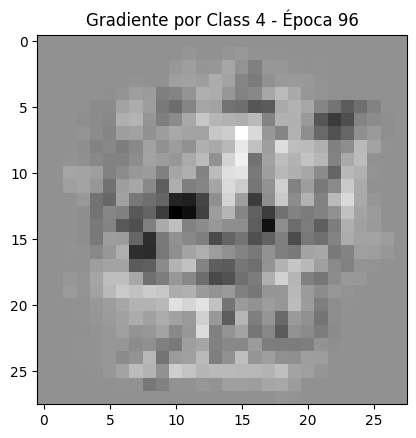

Época[96/100], Loss: 0.180697, Accuracy: 0.966000


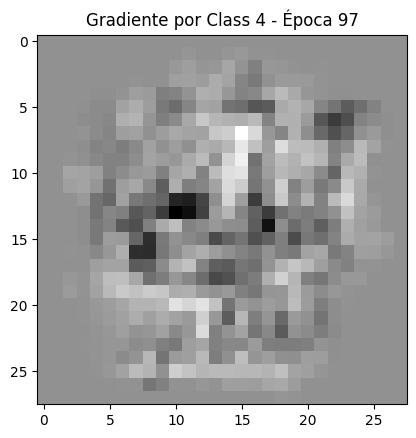

Época[97/100], Loss: 0.180106, Accuracy: 0.966000


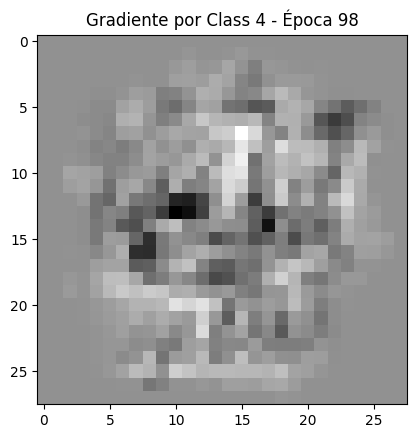

Época[98/100], Loss: 0.179519, Accuracy: 0.966000


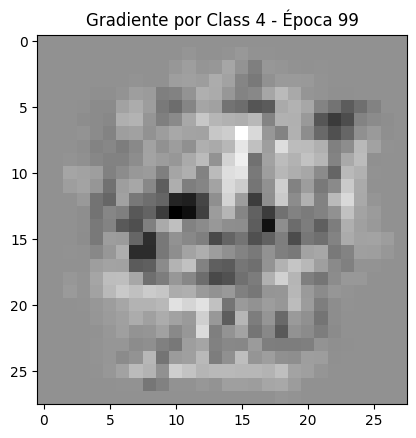

Época[99/100], Loss: 0.178936, Accuracy: 0.966000


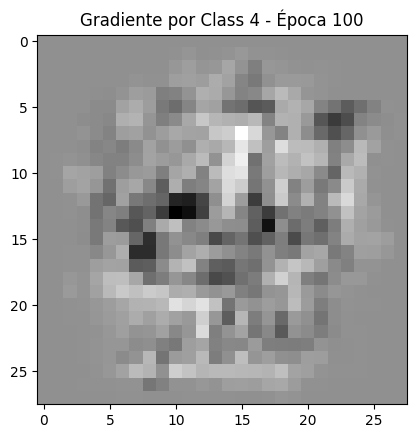

Época[100/100], Loss: 0.178356, Accuracy: 0.966000


In [16]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = x_train.view(-1, 28 * 28)
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, y_train)

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()

    # Visualização dos gradientes da classe 4
    if model.weight.grad is not None:
        grad_class_4 = model.weight.grad[4, :].cpu().numpy().reshape((28, 28))
        plt.imshow(grad_class_4, cmap='gray')
        plt.title(f'Gradiente por Class 4 - Época {i+1}')
        plt.show()

    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    print(f'Época[{i+1}/{epochs}], Loss: {loss.item():.6f}, Accuracy: {accuracy:.6f}')

In [ ]:
print('Final loss:', loss.item())

Final loss: 0.17851094901561737


### Visualizando gráfico de perda durante o treinamento

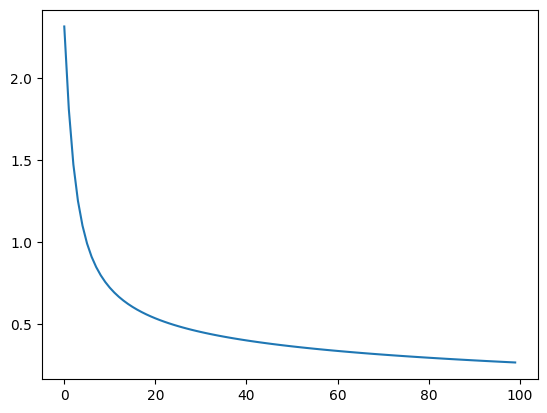

In [ ]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [ ]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.942


### Matriz de confusão com dados de treinamento e teste

In [ ]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,1,0,0,0,2,3,1,0
2,0,1,91,1,0,1,0,1,2,1
3,0,0,0,88,0,2,0,0,0,0
4,0,0,1,0,102,2,1,2,0,2
5,0,2,0,1,0,82,0,0,2,1
6,1,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,110,0,3
8,0,2,2,0,0,1,0,0,82,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


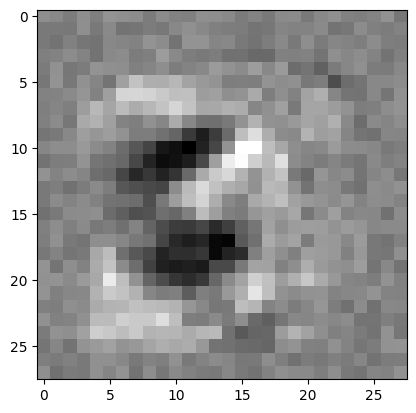

In [ ]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

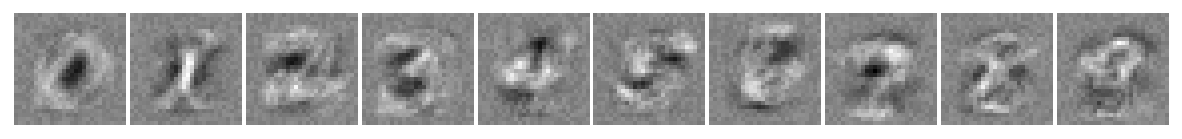

In [ ]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

     R: CÓDIGO INSERIDO NO LOOP

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

      R: CÓDIGO INSERIDO NO LOOP

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
(28*28)
2. Qual é o shape da saída da rede?
(10)
3. Qual é o número total de parâmetros da rede, incluindo o bias?
(28*28)*10+10

# Aprendizados
